In [1]:
# Importing Python modules for this exercise
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# import Goodreads library as a Pandas dataframe 
books = pd.read_csv("goodreads_library_export.csv")

# Clean up the dataset, remove uninteresting features 
books.drop(columns=["Book Id", "Author l-f", "Additional Authors", "ISBN", "ISBN13", "Bookshelves", "Bookshelves with positions", "Read Count", "Private Notes", "My Review", "Spoiler", "Recommended For", "Recommended By", "Owned Copies", "Original Purchase Location", "Original Purchase Date", "Condition", "Condition Description", "BCID"], inplace=True)

# have a look at the dataset
books.head()

,Title,Author,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf
0,Machine Learning for Designers,Patrick Hebron,4,3.78,O'Reilly,ebook,79.0,2016.0,NaN,2021/12/26,2021/12/18,read
1,Six Thinking Hats: The multi-million bestselli...,Edward de Bono,4,3.70,Penguin Life,Paperback,192.0,2016.0,1981.0,2021/12/22,2021/12/15,read
2,History and Class Consciousness: Studies in Ma...,György Lukács,0,4.04,MIT Press,Paperback,401.0,1972.0,1968.0,NaN,2021/12/17,to-read
3,Tristes Tropiques,Claude Lévi-Strauss,0,4.15,Penguin Books,Paperback,417.0,1992.0,1955.0,NaN,2021/12/16,to-read
4,The Personal MBA,Josh Kaufman,3,4.09,Portfolio,Paperback,496.0,2020.0,2010.0,2021/12/14,2021/08/22,read


In [160]:
# Find most read authors
books_read = books[(books['Exclusive Shelf'] == 'read')]

# Count the occurences of authors in the dataset, extract the value names (authors) and counts into two lists
authors_list = books_read['Author'].value_counts().index.tolist()
authors_count = books_read['Author'].value_counts().values.tolist()

# Get top 10 authors
top10_authors = authors_list[:10]
top10_authors_count = authors_count[:10]

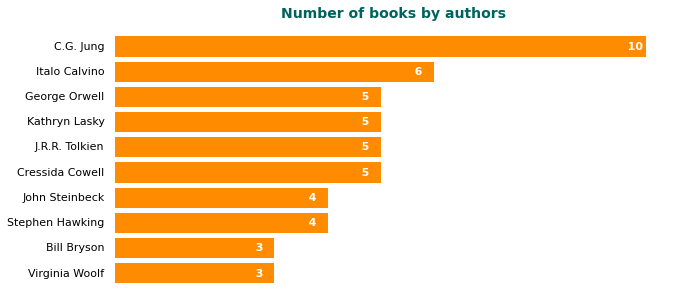

In [170]:
# Prepare the horizontal bar chart

# Reverse the order of the lists
top10_authors.reverse()
top10_authors_count.reverse()

x = [author + "  " for author in top10_authors]
y = top10_authors_count

fig, ax = plt.subplots(figsize=(10,5))    
width = 0.8

ind = np.arange(10) 
ax.barh(ind, y, width, color="#FF8C00")

ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False, weight='medium', size=11, fontdict={'verticalalignment': 'center'})

# Set title
plt.title('Number of books by authors', weight='bold', size=14, color='#00635d',)

# Declutter: remove chart borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Declutter: clean up axies 

# Hide the whole x-axis, including axis ticks, axis tick labels, and axis
ax.axes.xaxis.set_visible(False)
# Hide the y-axis ticks but keep tick labels
ax.tick_params(axis='y', length=0)

# Put number next to each bar. If you want the number to appear at the leftmost end, replave "v-0.5" with "0"
for i, v in enumerate(y):
    plt.text(v-0.5, i, "  "+str(v), color='white', va='center', size=11, fontweight='bold')

# Save the chart, then plot it on the screen
plt.savefig('books-by-authors.png', format='png', bbox_inches='tight')
plt.show()

# Reverse the order of the lists back
top10_authors.reverse()
top10_authors_count.reverse()

In [167]:
# Get the list of books by the Top 1 author

top1_author_lib = books_read.loc[books_read['Author'] == top10_authors[0]]
                                 
top1_author_lib.head(10)

,Title,Author,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf
46,Symbols of Transformation (Collected Works 5),C.G. Jung,5,4.45,Princeton University Press,Paperback,590.0,1977.0,1912.0,2021/03/26,2021/01/30,read
74,Psychological Types,C.G. Jung,5,4.32,Princeton University Press,Paperback,608.0,1976.0,1921.0,2020/07/30,2020/05/15,read
80,The Undiscovered Self,C.G. Jung,4,4.14,"Routledge, Taylor & Francis Books Ltd imprint",Paperback,79.0,2002.0,1961.0,2011/06/05,2011/05/31,read
93,The Earth Has a Soul: The Nature Writings of C...,C.G. Jung,5,4.38,North Atlantic Books,Paperback,248.0,2011.0,2002.0,2020/02/22,2017/05/26,read
98,The Seven Sermons to the Dead,C.G. Jung,4,4.14,NaN,Kindle Edition,17.0,2013.0,1925.0,2019/12/14,2019/12/08,read
139,The Archetypes and the Collective Unconscious ...,C.G. Jung,5,4.32,Princeton University Press,Paperback,451.0,1981.0,1959.0,2019/03/24,2017/04/13,read
140,Man and His Symbols,C.G. Jung,5,4.16,Dell,Mass Market Paperback,415.0,1968.0,1964.0,2017/04/13,2017/03/25,read
141,The Red Book: Liber Novus,C.G. Jung,5,4.52,W. W. Norton & Company,Hardcover,371.0,2009.0,2009.0,2016/12/23,2016/09/08,read
142,Modern Man in Search of a Soul,C.G. Jung,5,4.20,Routledge,Paperback,264.0,2005.0,1931.0,2013/04/12,2013/03/07,read
143,Psychology and the East,C.G. Jung,4,4.14,Routledge Classics,Paperback,240.0,2008.0,1978.0,2015/07/18,2015/07/01,read


In [127]:
# Get a subset of the book library with only the top authors
top10_authors_lib = books_read.loc[books_read['Author'].isin(top10_authors)]

# Order the library
sorted_lib = top10_authors_lib.sort_values(by=['Date Read'])

# Add a new column
sorted_lib['Year Read'] = pd.DatetimeIndex(sorted_lib['Date Read']).year

# Remove rows with missing values
sorted_lib.dropna(inplace=True)

sorted_lib.head()

,Title,Author,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,Year Read
385,Animal Farm,George Orwell,5,3.97,NAL,Paperback,122.0,2003.0,1945.0,2009/08/22,2011/05/31,read,2009.0
370,1984,George Orwell,5,4.19,New American Library,Mass Market Paperback,328.0,1950.0,1949.0,2010/01/11,2011/05/31,read,2010.0
243,A Short History of Nearly Everything,Bill Bryson,5,4.18,Black Swan,Paperback,687.0,2004.0,2003.0,2010/02/01,2016/06/15,read,2010.0
214,Cannery Row,John Steinbeck,4,4.05,Penguin Books,Paperback,148.0,2001.0,1945.0,2010/10/13,2011/06/01,read,2010.0
397,A Brief History of Time,Stephen Hawking,5,4.19,Bantam Books,Paperback,212.0,1998.0,1988.0,2010/12/06,2011/06/01,read,2010.0


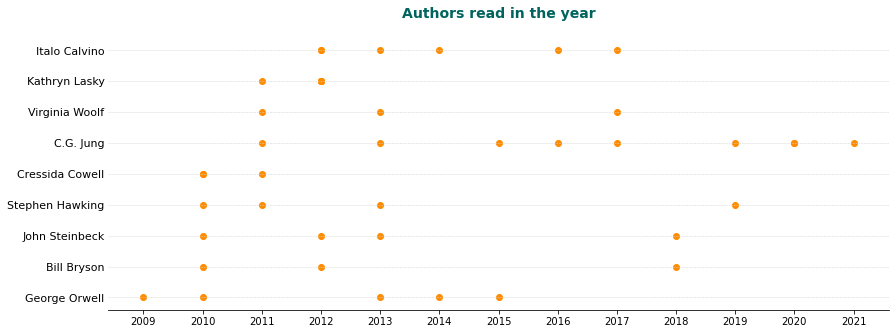

In [176]:
# Prepare the scatterplot

fig2, ax2 = plt.subplots(figsize=(14,5))

x = sorted_lib['Year Read'].tolist()
y = sorted_lib['Author'].tolist()

x = [str(item).replace('.0', '') for item in x]

# Set title
plt.title('Authors read in the year', pad=20, weight='bold', size=14, color='#00635d')

# Declutter: remove chart borders
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.tick_params(axis='y', length=0, labelsize=11)

plt.scatter(x, y, color="#FF8C00")
plt.grid(axis = 'y', color = 'lightgrey', linestyle = '--', linewidth = 0.5)

plt.savefig('authors-by-year.png', format='png', bbox_inches='tight')
plt.show()